In [1]:
import numpy as np
import jax
import jax.numpy as jnp

import matplotlib.pyplot as plt
from envs.single_photon_env import SinglePhotonLangevinReadoutEnv
from utils import *

import pandas as pd

In [2]:
df = pd.read_csv('fig 4 pFs and times v2')
df.head()

,Unnamed: 0,kappas,chis,pFs from 0th action of batch,times from 0th action of batch,pFs from mean action,times from mean action,times from mean action to 0.1 photons
0,0,13.5945,1.850398,2.234153,0.430235,2.230980,0.427928,0.412335
1,1,14.3100,1.850398,2.226370,0.436653,2.225501,0.424864,0.407137
2,2,15.0255,1.850398,2.212510,0.436826,2.210476,0.438358,0.400583
3,3,13.5945,1.947787,2.234868,0.433125,2.239314,0.435733,0.429660
4,4,14.3100,1.947787,2.212715,0.407137,2.212453,0.406209,0.395010


In [3]:
actions = np.load('final action batch fig 4 v2.npy')
print(actions.shape)

(9, 256, 121)


In [4]:
from env_configs import get_sherbrooke_config

s_config = get_sherbrooke_config()
env = SinglePhotonLangevinReadoutEnv(**s_config)

In [5]:
batch_smoother = jax.jit(jax.vmap(env.drive_smoother, in_axes=0))
flattened_actions = actions.reshape(-1, actions.shape[-1])
flattened_actions.shape

(2304, 121)

In [7]:
smoothened_actions = batch_smoother(flattened_actions)

In [8]:
smooth_actions = smoothened_actions.reshape(actions.shape)
smooth_actions.shape

(9, 256, 121)

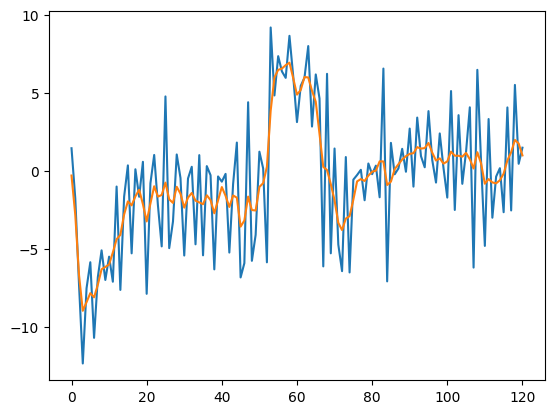

In [10]:
plt.plot(actions[0,0])
plt.plot(smooth_actions[0,0])

In [11]:
np.save("Smooth Final Action Batch Fig 4 v2.npy", smooth_actions)

In [6]:
mean_actions = -jnp.mean(actions, axis=1)
mean_actions.shape

(9, 121)

In [12]:
np_data = df.to_numpy()
kappas = np_data[:, 1]
chis = np_data[:, 2]

kappas

array([13.5945, 14.31  , 15.0255, 13.5945, 14.31  , 15.0255, 13.5945,
       14.31  , 15.0255])

In [13]:
chis

array([1.85039807, 1.85039807, 1.85039807, 1.94778745, 1.94778745,
       1.94778745, 2.04517682, 2.04517682, 2.04517682])

In [19]:
vary_kappa_actions = mean_actions[3:6]
vary_kappa_actions.shape

(3, 121)

[2.23094018 2.22547854 2.19627256 2.23319517 2.20859701 2.20323231
 2.21102831 2.20243666 2.2051125 ]
[0.42142526 0.4383225  0.426195   0.433125   0.40243619 0.43659
 0.39691523 0.39705613 0.43514827]


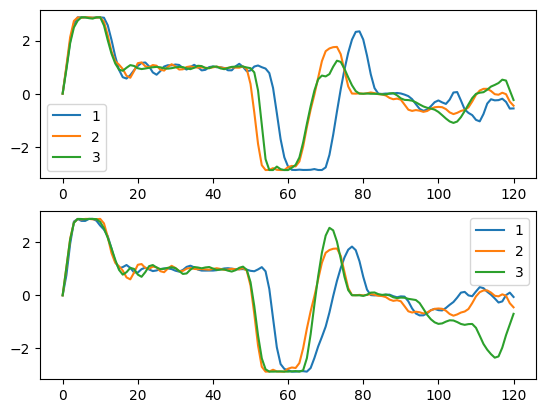

In [32]:
print(np_data[:, 5])
print(np_data[:, 6])

kappa_action_1 = mean_actions[3]
kappa_action_2 = mean_actions[4]
kappa_action_3 = mean_actions[5]

chi_action_1 = -mean_actions[1]
chi_action_2 = mean_actions[4]
chi_action_3 = -mean_actions[7]

fig, ax =  plt.subplots(2)



ax[0].plot(kappa_action_1, label='1')
ax[0].plot(kappa_action_2, label='2')
ax[0].plot(kappa_action_3, label='3')
ax[0].legend()

ax[1].plot(chi_action_1, label='1')
ax[1].plot(chi_action_2, label='2')
ax[1].plot(chi_action_3, label='3')
ax[1].legend()

plt.show()